# Imports

In [6]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Retrieving images from folders

In [7]:
train_img_generator = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_img_generator = ImageDataGenerator(rescale=1./255)
train_generator = train_img_generator.flow_from_directory(
    './data/train',
    class_mode='categorical',
    target_size=(64, 64),
    color_mode="rgb",
    batch_size=16,
    shuffle=True,
    seed=42)

validation_generator = val_img_generator.flow_from_directory(
    './data/validation',
    class_mode='categorical',
    target_size=(64, 64),
    batch_size=1,
    )

Found 1640 images belonging to 3 classes.
Found 244 images belonging to 3 classes.


# CNN Model

In [8]:
def create_cnn_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.Input(shape=(64,64,3)))
  model.add(tf.keras.layers.Conv2D(6, (3, 3), padding='same', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))  
  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(512))
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(128))
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(64))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(3))
  model.add(tf.keras.layers.Activation('softmax'))
  return model

# Training the CNN model

2023-04-05 13:57:31.172619: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
103/103 [==============================] - 25s 233ms/step - loss: 0.7532 - categorical_accuracy: 0.6372 - val_loss: 0.2112 - val_categorical_accuracy: 0.9426
Epoch 2/10
103/103 [==============================] - 23s 228ms/step - loss: 0.3838 - categorical_accuracy: 0.8561 - val_loss: 0.1581 - val_categorical_accuracy: 0.9467
Epoch 3/10
103/103 [==============================] - 24s 232ms/step - loss: 0.3472 - categorical_accuracy: 0.8689 - val_loss: 0.1919 - val_categorical_accuracy: 0.9303
Epoch 4/10
103/103 [==============================] - 24s 234ms/step - loss: 0.3239 - categorical_accuracy: 0.8829 - val_loss: 0.1292 - val_categorical_accuracy: 0.9549
Epoch 5/10
103/103 [==============================] - 24s 228ms/step - loss: 0.2897 - categorical_accuracy: 0.9061 - val_loss: 0.1480 - val_categorical_accuracy: 0.9508
Epoch 6/10
103/103 [==============================] - 24s 229ms/step - loss: 0.2850 - categorical_accuracy: 0.9030 - val_loss: 0.1005 - val_categorical_acc

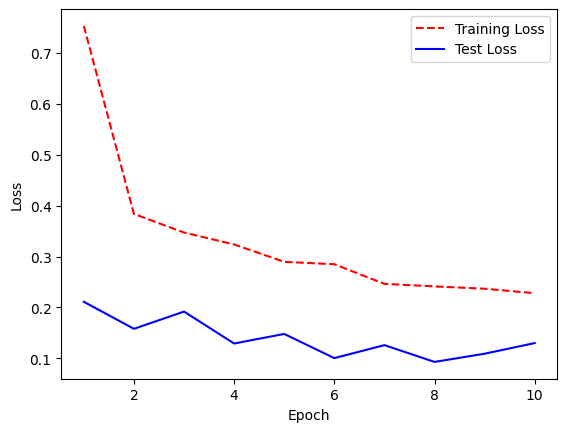

In [3]:
model = create_cnn_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss='categorical_crossentropy',metrics=['categorical_accuracy'])

history = model.fit(train_generator,epochs=10,validation_data=validation_generator,validation_freq=1)

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

model.save('model.h5', overwrite=True)

## Loading the model 

In [4]:
model = tf.keras.models.load_model('model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 6)         168       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        880       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 32)         0

2023-04-05 15:58:22.638333: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
 activation_2 (Activation)   (None, 3)                 0         
                                                                 
Total params: 623,099
Trainable params: 623,099
Non-trainable params: 0
_________________________________________________________________
